In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the data set using the Kaggle API:**

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download dgomonov/new-york-city-airbnb-open-data

In [ ]:
! unzip new-york-city-airbnb-open-data

In [ ]:
airbnb_ori = pd.read_csv("AB_NYC_2019.csv")

## Cleaning:

In [ ]:
airbnb_ori

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]

**Data types of the raw data set:**

In [ ]:
airbnb_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_ori.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
airbnb_cl = airbnb_ori.copy()

In [ ]:
airbnb_cl

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]

**Determining non-numeric and numeric fields:**

In [ ]:
categoical_df = airbnb_cl.select_dtypes(include=['object'])
number_df = airbnb_cl.select_dtypes(exclude=['object'])

def column_types(non_numeric_df, numeric_df):
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
column_types(categoical_df, number_df)

Non-Numeric columns:
name
host_name
neighbourhood_group
neighbourhood
room_type
last_review

Numeric columns:
id
host_id
latitude
longitude
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [ ]:
airbnb_cl.index.name = "Index"

In [ ]:
airbnb_cl

id  ... availability_365
Index            ...                 
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]

**Showing the number of records that do not have values per field:**

In [ ]:
def missing_columns(airbnb_cl):
    total = 0
    for col in airbnb_cl.columns:
        missing_values = airbnb_cl[col].isnull().sum()
        total += missing_values
        if missing_values != 0:
            print(f"{col} => {airbnb_cl[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_columns(airbnb_cl)

name => 16
host_name => 21
last_review => 10052
reviews_per_month => 10052


In [ ]:
def perc_missing(airbnb_cl):
    for col in airbnb_cl.columns:
        pct = airbnb_cl[col].isnull().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(airbnb_cl)

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


**Removing the "host name" field since that will not be used in our analysis:**

In [ ]:
drop_coloumns = ['host_name']

airbnb_cl.drop(drop_coloumns, axis=1, inplace=True)

missing_columns(airbnb_cl)

name => 16
last_review => 10052
reviews_per_month => 10052


**Removing records that has a value of null or zero in the "price" field:**

In [ ]:
airbnb_cl['price'].dropna(inplace=True)

In [ ]:
airbnb_cl["price"]

Index
0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [ ]:
airbnb_cl["price"].min()

0

In [ ]:
airbnb_cl = airbnb_cl[airbnb_cl.price != 0]

In [ ]:
airbnb_cl

id  ... availability_365
Index            ...                 
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48884 rows x 15 columns]

In [ ]:
airbnb_cl["price"].min()

10

**Converting the "Last review" column to datetype data type:**

In [ ]:
airbnb_cl["last_review"] = pd.to_datetime(airbnb_cl["last_review"], format="%Y-%m-%d")
airbnb_cl["last_review"].dtype.type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


numpy.datetime64

In [ ]:
airbnb_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48884 non-null  int64         
 1   name                            48868 non-null  object        
 2   host_id                         48884 non-null  int64         
 3   neighbourhood_group             48884 non-null  object        
 4   neighbourhood                   48884 non-null  object        
 5   latitude                        48884 non-null  float64       
 6   longitude                       48884 non-null  float64       
 7   room_type                       48884 non-null  object        
 8   price                           48884 non-null  int64         
 9   minimum_nights                  48884 non-null  int64         
 10  number_of_reviews               48884 non-null  int64         
 11  la

In [ ]:
airbnb_cl["last_review"].min() #shows the earliest "last review" date

Timestamp('2011-03-28 00:00:00')

**Removed the "name" field since that will not be used in our analysis:**

In [ ]:
drop_coloumns = ['name']

airbnb_cl.drop(drop_coloumns, axis=1, inplace=True)

missing_columns(airbnb_cl)

last_review => 10051
reviews_per_month => 10051


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
airbnb_cl

id   host_id  ... calculated_host_listings_count availability_365
Index                      ...                                                
0          2539      2787  ...                              6              365
1          2595      2845  ...                              2              355
2          3647      4632  ...                              1              365
3          3831      4869  ...                              1              194
4          5022      7192  ...                              1                0
...         ...       ...  ...                            ...              ...
48890  36484665   8232441  ...                              2                9
48891  36485057   6570630  ...                              2               36
48892  36485431  23492952  ...                              1               27
48893  36485609  30985759  ...                              6                2
48894  36487245  68119814  ...                              1               23

[48884 rows x 14 columns]

**We replaced the null values in the "reviews per month" field with 0. This field is null when there are no reviews at all.**

In [ ]:
airbnb_cl.fillna({'reviews_per_month':0}, inplace=True)

missing_columns(airbnb_cl)

last_review => 10051


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
airbnb_cl

id   host_id  ... calculated_host_listings_count availability_365
Index                      ...                                                
0          2539      2787  ...                              6              365
1          2595      2845  ...                              2              355
2          3647      4632  ...                              1              365
3          3831      4869  ...                              1              194
4          5022      7192  ...                              1                0
...         ...       ...  ...                            ...              ...
48890  36484665   8232441  ...                              2                9
48891  36485057   6570630  ...                              2               36
48892  36485431  23492952  ...                              1               27
48893  36485609  30985759  ...                              6                2
48894  36487245  68119814  ...                              1               23

[48884 rows x 14 columns]

**We tried converting the null values in the "last review" field to 0; however, that prevented us from running descriptive statistics (e.g. earliest date) on that column. We then restored the null values, which again allowed us to run descriptive statistics on the column. (Steps for converting from null to 0 have been removed from the notebook.)**

In [ ]:
airbnb_cl["last_review"].replace(np.NaN,pd.NaT, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
airbnb_cl

id   host_id  ... calculated_host_listings_count availability_365
Index                      ...                                                
0          2539      2787  ...                              6              365
1          2595      2845  ...                              2              355
2          3647      4632  ...                              1              365
3          3831      4869  ...                              1              194
4          5022      7192  ...                              1                0
...         ...       ...  ...                            ...              ...
48890  36484665   8232441  ...                              2                9
48891  36485057   6570630  ...                              2               36
48892  36485431  23492952  ...                              1               27
48893  36485609  30985759  ...                              6                2
48894  36487245  68119814  ...                              1               23

[48884 rows x 14 columns]

In [ ]:
airbnb_cl["last_review"].min() #earliest last review date

Timestamp('2011-03-28 00:00:00')

In [ ]:
airbnb_cl["last_review"].describe() #descriptive statistics for the last review date field

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   38833
unique                   1764
top       2019-06-23 00:00:00
freq                     1412
first     2011-03-28 00:00:00
last      2019-07-08 00:00:00
Name: last_review, dtype: object

In [ ]:
airbnb_cl.describe()

id  ...  availability_365
count  4.888400e+04  ...      48884.000000
mean   1.901679e+07  ...        112.779498
std    1.098432e+07  ...        131.627271
min    2.539000e+03  ...          0.000000
25%    9.470548e+06  ...          0.000000
50%    1.967574e+07  ...         45.000000
75%    2.915297e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

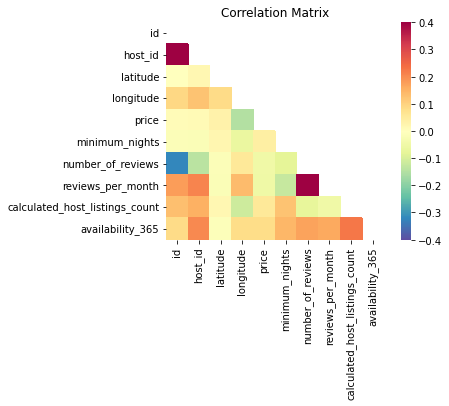

In [ ]:
corrs = airbnb_cl.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation Matrix');

**Picking our current dataframe object for later use:**

In [ ]:
import pickle

In [ ]:
with open("final project.bin", "rb") as infile:
  airbnb_cl = pickle.load(infile)

In [ ]:
airbnb_cl

id   host_id  ... calculated_host_listings_count availability_365
Index                      ...                                                
0          2539      2787  ...                              6              365
1          2595      2845  ...                              2              355
2          3647      4632  ...                              1              365
3          3831      4869  ...                              1              194
4          5022      7192  ...                              1                0
...         ...       ...  ...                            ...              ...
48890  36484665   8232441  ...                              2                9
48891  36485057   6570630  ...                              2               36
48892  36485431  23492952  ...                              1               27
48893  36485609  30985759  ...                              6                2
48894  36487245  68119814  ...                              1               23

[48884 rows x 14 columns]

# Analysis:

In [ ]:
from geopy import distance #this library contains functions to calculate the distance between two points on earth given latitude and longtiude

**Creating a user-defined function to return the distance of given latitude and longtiude from Times Square, NY. The goal is to calculate the distance from the "city-center" of NYC.**

In [ ]:
def distance_TS(lat, lon): 
  TS_lat = 40.758896 #latitude of Times Square in NYC
  TS_lon = -73.985130 #longtiude of Times Square in NYC
  return float(distance.distance((lat, lon), (TS_lat, TS_lon)).miles)

**Add a new column based on the result of the user-defined function above. The Latitude and Longtiude of each listing serves as parameters for the function.**

In [ ]:
airbnb_cl['distance_from_TS'] = airbnb_cl.apply(lambda x: distance_TS(x['latitude'], x['longitude']), axis=1)

In [ ]:
airbnb_cl

id   host_id  ... availability_365 distance_from_TS
Index                      ...                                  
0          2539      2787  ...              365         7.716400
1          2595      2845  ...              355         0.370987
2          3647      4632  ...              365         4.135668
3          3831      4869  ...              194         5.260729
4          5022      7192  ...                0         3.482623
...         ...       ...  ...              ...              ...
48890  36484665   8232441  ...                9         5.844933
48891  36485057   6570630  ...               36         4.789475
48892  36485431  23492952  ...               27         4.302407
48893  36485609  30985759  ...                2         0.328523
48894  36487245  68119814  ...               23         0.417791

[48884 rows x 15 columns]

**We then ran a correlation matrix. The result we're interested in is the correlation for distance_from_TS and price. Direction of correlation seems intutive (negative, indicating inverse, as listing would be less expensive the farther it is from the city-center). However, the absolute figure of the correlation appears to indicate that it is a weak correlation.**

In [ ]:
airbnb_cl.corr()

id  ...  distance_from_TS
id                              1.000000  ...          0.065293
host_id                         0.588316  ...          0.090574
latitude                       -0.003115  ...         -0.424130
longitude                       0.090895  ...          0.532067
price                           0.010639  ...         -0.171777
minimum_nights                 -0.013229  ...         -0.075872
number_of_reviews              -0.319800  ...          0.059032
reviews_per_month               0.180240  ...          0.115027
calculated_host_listings_count  0.133275  ...         -0.117786
availability_365                0.085468  ...          0.085828
distance_from_TS                0.065293  ...          1.000000

[11 rows x 11 columns]

In [ ]:
airbnb_copy = airbnb_cl.copy()

**We hypothesis that prices for recent listings may not be indicative of "market price" of listing given it hasn't been on the market for that long. Here, we will try removing recent listings by removing those that do not yet have a review.**

In [ ]:
airbnb_wo_recent_review = airbnb_copy[airbnb_copy["last_review"].notnull()]

In [ ]:
airbnb_wo_recent_review

id    host_id  ... calculated_host_listings_count availability_365
Index                       ...                                                
0          2539       2787  ...                              6              365
1          2595       2845  ...                              2              355
3          3831       4869  ...                              1              194
4          5022       7192  ...                              1                0
5          5099       7322  ...                              1              129
...         ...        ...  ...                            ...              ...
48782  36425863   83554966  ...                              1              147
48790  36427429  257683179  ...                              6              339
48799  36438336  211644523  ...                              1               87
48805  36442252  273841667  ...                              1               40
48852  36455809   74162901  ...                              1                1

[38833 rows x 14 columns]

**Correlation between price and distance_from_TS has not changed materially from before. This seems to indicate that there wasn't much effect from removing the recent listings.**

In [ ]:
airbnb_wo_recent_review.corr()

id  ...  distance_from_TS
id                              1.000000  ...          0.083487
host_id                         0.591557  ...          0.113054
latitude                       -0.009992  ...         -0.421672
longitude                       0.103116  ...          0.531295
price                          -0.006605  ...         -0.183422
minimum_nights                 -0.073918  ...         -0.071572
number_of_reviews              -0.329909  ...          0.048013
reviews_per_month               0.291862  ...          0.109965
calculated_host_listings_count  0.098484  ...         -0.074624
availability_365                0.006416  ...          0.120034
distance_from_TS                0.083487  ...          1.000000

[11 rows x 11 columns]

**We then tried to normalize the effects of other factors, such as room type and minimum number of nights, by restricing the data set for each combination of room type and minimum number of nights. Correlation between distance and price range from -0.15 to -0.12. This seems to indiciate that with other factors normalized, distance from city-center does not have a significant impact on the price.**

In [ ]:
df_private_room = airbnb_cl[(airbnb_cl["room_type"] == "Private room") & (airbnb_cl["minimum_nights"] == 1)]

In [ ]:
df_private_room

id    host_id  ... calculated_host_listings_count availability_365
Index                       ...                                                
0          2539       2787  ...                              6              365
17         7322      18946  ...                              1               12
22         8025      22486  ...                              6              364
25         8505      25326  ...                              2               85
34        10452      35935  ...                              2              269
...         ...        ...  ...                            ...              ...
48865  36472171   99144947  ...                              1               79
48875  36478343  274273284  ...                              1              180
48876  36478357  177932088  ...                              1               26
48878  36479723   41326856  ...                              5              172
48889  36484363  107716952  ...                              2              163

[7884 rows x 14 columns]

**The filtered dataset (shown above) that we are running the correlation matrix on (shown below) only contains listings that have "1" for minimum_nights. The value in the minimium_nights field is unchanging, hence by definition, it does not have a correlation compared against the other variables. (The corr() function shows an output of NaN rather than 0 for correlation.)**

In [ ]:
df_private_room.corr()

id  ...  availability_365
id                              1.000000  ...          0.168713
host_id                         0.655378  ...          0.241147
latitude                       -0.005704  ...         -0.007081
longitude                       0.118062  ...          0.114982
price                           0.025773  ...          0.082407
minimum_nights                       NaN  ...               NaN
number_of_reviews              -0.285429  ...          0.181563
reviews_per_month               0.210359  ...          0.184063
calculated_host_listings_count  0.178798  ...          0.365525
availability_365                0.168713  ...          1.000000

[10 rows x 10 columns]

In [ ]:
df_entire_home = airbnb_cl[(airbnb_cl["room_type"] == "Entire home/apt") & (airbnb_cl["minimum_nights"] == 1)]

In [ ]:
df_entire_home

id    host_id  ... calculated_host_listings_count availability_365
Index                       ...                                                
1          2595       2845  ...                              2              355
3          3831       4869  ...                              1              194
9          5238       7549  ...                              4              188
68        16595      64522  ...                              1              362
85        19601      74303  ...                              1                7
...         ...        ...  ...                            ...              ...
48861  36468409   57502664  ...                              1                1
48866  36472710  274225617  ...                              1              159
48873  36477307  241945355  ...                              2              363
48880  36481315  208514239  ...                              3              365
48887  36483152  208514239  ...                              3              365

[4227 rows x 14 columns]

In [ ]:
df_entire_home.corr()

id  ...  availability_365
id                              1.000000  ...          0.224361
host_id                         0.657678  ...          0.243461
latitude                       -0.050010  ...         -0.082307
longitude                       0.149913  ...          0.140609
price                          -0.008533  ...          0.120586
minimum_nights                       NaN  ...               NaN
number_of_reviews              -0.225131  ...          0.289267
reviews_per_month               0.314874  ...          0.311490
calculated_host_listings_count  0.150714  ...          0.196247
availability_365                0.224361  ...          1.000000

[10 rows x 10 columns]

In [ ]:
df_shared_room = airbnb_cl[(airbnb_cl["room_type"] == "Shared room") & (airbnb_cl["minimum_nights"] == 1)]

In [ ]:
df_shared_room

id    host_id  ... calculated_host_listings_count availability_365
Index                       ...                                                
39        12048       7549  ...                              4              188
545      200645     933378  ...                              1                0
975      391948    1960128  ...                              2              364
1103     467634    2321321  ...                              1              353
1175     502132      48599  ...                              2                0
...         ...        ...  ...                            ...              ...
48729  36409084  272477673  ...                              3              352
48785  36426720   67738361  ...                              2              168
48832  36450814  267223765  ...                              3              363
48867  36473044  261338177  ...                              6              338
48893  36485609   30985759  ...                              6                2

[606 rows x 14 columns]

In [ ]:
df_shared_room.corr()

id  ...  availability_365
id                              1.000000  ...          0.174863
host_id                         0.649580  ...          0.172537
latitude                       -0.016514  ...         -0.073759
longitude                       0.044677  ...          0.054186
price                          -0.105193  ...         -0.077936
minimum_nights                       NaN  ...               NaN
number_of_reviews              -0.315452  ...          0.065416
reviews_per_month               0.243817  ...          0.150249
calculated_host_listings_count  0.258226  ...          0.268280
availability_365                0.174863  ...          1.000000

[10 rows x 10 columns]

## Ploting of Listings:

**Here we show visually where the listrings are located on a map:**

In [ ]:
import plotly.express as px #https://plotly.com/python/mapbox-layers/

**Location of all listings in the data set:**

In [ ]:
fig = px.scatter_mapbox(airbnb_cl, lat="latitude", lon="longitude", hover_name="id", hover_data=["neighbourhood_group", "neighbourhood", "price"],
                        color_discrete_sequence=["blue"], zoom=10, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Location of the 500 most expensive listings:**

In [ ]:
fig = px.scatter_mapbox(airbnb_cl.nlargest(500, "price"), lat="latitude", lon="longitude", hover_name="id", hover_data=["neighbourhood_group", "neighbourhood", "price"],
                        color_discrete_sequence=["blue"], zoom=10, height=400, width=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Locations of the 500 least expensive listings:**

In [ ]:
fig = px.scatter_mapbox(airbnb_cl.nsmallest(500, "price"), lat="latitude", lon="longitude", hover_name="id", hover_data=["neighbourhood_group", "neighbourhood", "price"],
                        color_discrete_sequence=["blue"], zoom=10, height=400, width=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Additional visualization of the data set:**

In [ ]:
AB_agg = airbnb_cl.groupby("host_id").sum().reset_index()
AB_agg.sort_values("number_of_reviews",ascending=False, inplace=True)
AB = AB_agg.iloc[:20]
AB_group = AB[["host_id", "number_of_reviews"]]
AB_group

host_id  number_of_reviews
21314   37312959               2273
1052      344035               2205
18634   26432133               2017
20882   35524316               1971
21932   40176101               1818
7365     4734398               1798
14712   16677326               1355
9206     6885157               1346
34644  219517861               1281
17523   23591164               1269
25451   59529529               1229
23497   47621202               1205
17274   22959695               1157
25342   58391491               1154
16717   21641206               1062
474       137814               1059
32115  156948703               1052
32104  156684502               1046
5774     3441272               1013
9972     7831209                970

In [ ]:
AB_group = AB_group.astype({"host_id":str},errors = "raise")
AB_group.dtypes


host_id              object
number_of_reviews     int64
dtype: object

Text(0.5, 1.0, 'Top 20 hosts with the most listings')

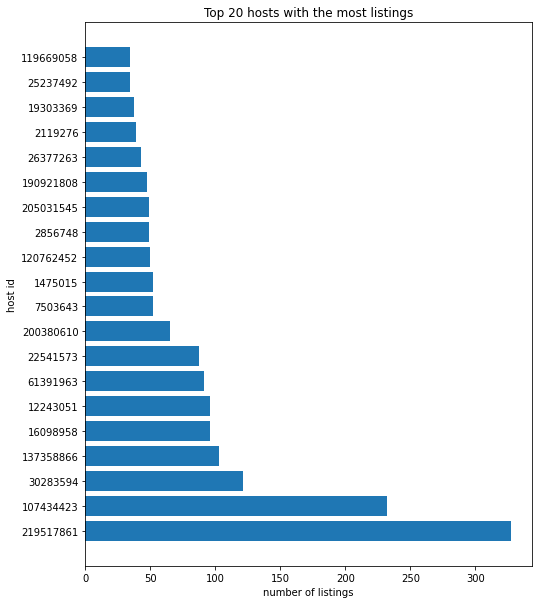

In [ ]:
import matplotlib.pyplot as plt

AB_agg_count = airbnb_cl.groupby("host_id").count().reset_index()
AB_agg_count.sort_values(by="id", ascending=False, inplace=True)
AB_agg_count = AB_agg_count.iloc[:20].copy()
#AB_agg_count
#AB_agg_count.sort_values(by="id",ascending=True, inplace=True)
AB_agg_count = AB_agg_count.astype({"host_id":str},errors = "raise")


plt.figure(figsize=(8, 10))
#plt.barh(y=AB_group["host_id"], width=AB_group["number_of_reviews"].sort_values(ascending=True))
plt.barh(y=AB_agg_count["host_id"], width=AB_agg_count["id"])
plt.xlabel("number of listings")
plt.ylabel("host id")
plt.title("Top 20 hosts with the most listings")

In [ ]:
AB_agg_count = airbnb_cl.groupby("host_id").count().reset_index()
AB_agg_count.head()

host_id  id  ...  availability_365  distance_from_TS
0     2438   1  ...                 1                 1
1     2571   1  ...                 1                 1
2     2787   6  ...                 6                 6
3     2845   2  ...                 2                 2
4     2868   1  ...                 1                 1

[5 rows x 15 columns]

In [ ]:
AB_agg_count

host_id  id  ...  availability_365  distance_from_TS
0     2438   1  ...                 1                 1
1     2571   1  ...                 1                 1
2     2787   6  ...                 6                 6
3     2845   2  ...                 2                 2
4     2868   1  ...                 1                 1
5     2881   2  ...                 2                 2
6     3151   1  ...                 1                 1
7     3211   1  ...                 1                 1
8     3415   1  ...                 1                 1
9     3563   1  ...                 1                 1
10    3647   2  ...                 2                 2
11    3867   2  ...                 2                 2
12    4396   2  ...                 2                 2
13    4632   1  ...                 1                 1
14    4869   1  ...                 1                 1
15    5089   1  ...                 1                 1
16    6041   1  ...                 1                 1
17    6485   1  ...                 1                 1
18    7192   1  ...                 1                 1
19    7209   1  ...                 1                 1

[20 rows x 15 columns]

In [ ]:
airbnb_cl[airbnb_cl["host_id"] == 219517861].count()

id                                327
host_id                           327
neighbourhood_group               327
neighbourhood                     327
latitude                          327
longitude                         327
room_type                         327
price                             327
minimum_nights                    327
number_of_reviews                 327
last_review                       207
reviews_per_month                 327
calculated_host_listings_count    327
availability_365                  327
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import datetime
import plotly.express as px



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.figure(figsize=(5, 5))
AB_agg2 = airbnb_wo_recent_review.groupby("last_review").sum().reset_index()
ABdf = pd.DataFrame(AB_agg2)
ABdf["last_review"] = pd.to_datetime(ABdf["last_review"])
ABdf2 = ABdf[ABdf["number_of_reviews"]<=1000]
fig = px.scatter(ABdf2, x=ABdf2["last_review"], y=ABdf2["number_of_reviews"], 
                 trendline="ols", trendline_color_override="red",
                 title="The number of reviews fitted line")
fig.show()


<Figure size 360x360 with 0 Axes>

In [ ]:
# The price trend
plt.figure(figsize=(10, 5))
AB_agg3=airbnb_wo_recent_review.groupby("last_review").mean("price").reset_index()
ABdf3=pd.DataFrame(AB_agg3)
ABdf3=ABdf[ABdf["price"]<=1000]
ABdf3["last_review"]=pd.to_datetime(ABdf["last_review"])
fig2 = px.scatter(ABdf3, x=ABdf3["last_review"], y=ABdf3["price"], 
                 trendline="ols",trendline_color_override="red",
                 title=" Average price fitted line")
fig2.show()

<Figure size 720x360 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

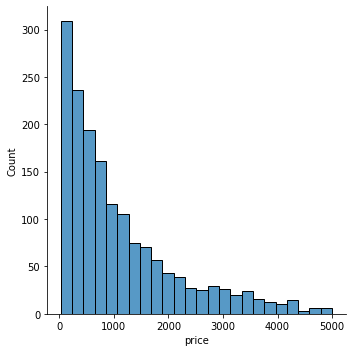

In [ ]:
# The density of price range
plt.figure(figsize=(20, 10))
ABdf3=ABdf[ABdf["price"]<=5000]
sns.displot(data=ABdf3["price"]);

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

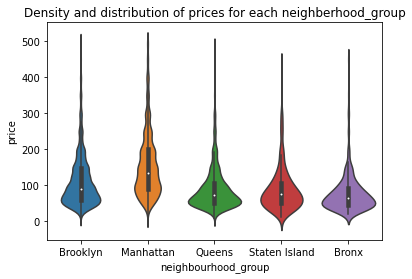

In [ ]:
#using violinplot to showcase density and distribtuion of prices 
ABviolin=sns.violinplot(data=airbnb_wo_recent_review[airbnb_wo_recent_review["price"]<500], x='neighbourhood_group', y='price')

ABviolin.set_title('Density and distribution of prices for each neighberhood_group')

In [ ]:
df_bor = airbnb_cl.groupby(['neighbourhood_group']).mean().reset_index().sort_values(by=['price'], ascending=True)

In [ ]:
df_bor

neighbourhood_group  ...  availability_365
0               Bronx  ...        165.794495
3              Queens  ...        144.451818
4       Staten Island  ...        199.678284
1            Brooklyn  ...        100.217318
2           Manhattan  ...        111.984580

[5 rows x 11 columns]

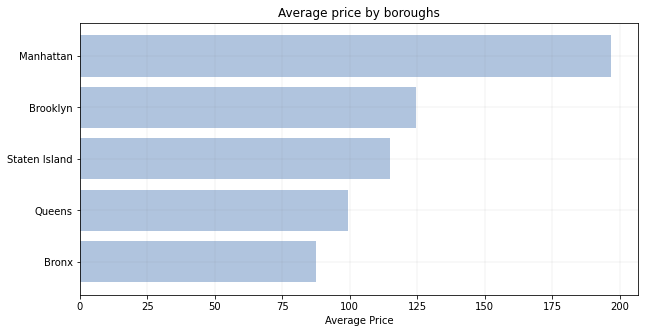

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(y=df_bor['neighbourhood_group'], width=df_bor['price'], color='lightsteelblue')
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.1)
plt.xlabel('Average Price');
plt.title("Average price by boroughs");

In [ ]:
df_bor_rm = airbnb_cl.groupby(['neighbourhood_group', 'room_type']).mean().reset_index().sort_values(by=['price'], ascending=True)

In [ ]:
df_bor_rm = df_bor_rm[['neighbourhood_group','room_type','price']]

In [ ]:
df_bor_rm = df_bor_rm.pivot(index='neighbourhood_group',columns='room_type',values='price')

In [ ]:
df_bor_rm

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.890937    59.800000
Brooklyn                  178.346202     76.545428    50.773723
Manhattan                 249.257994    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444

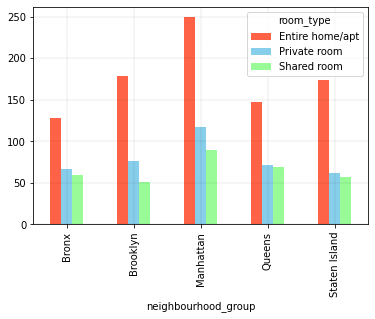

In [ ]:
df_bor_rm.plot(kind='bar', color=['tomato','skyblue','palegreen'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.1)

In [ ]:
import sqlite3 

In [ ]:
conn = sqlite3.connect("airbnb_cleanedupdata.db")

In [ ]:
airbnb_cl.to_sql('Cleaned_Up_Data', conn, if_exists = 'append', index = False)


In [ ]:
pd.read_sql('select * from Cleaned_Up_Data', conn)


id   host_id  ... calculated_host_listings_count availability_365
0          2539      2787  ...                              6              365
1          2595      2845  ...                              2              355
2          3647      4632  ...                              1              365
3          3831      4869  ...                              1              194
4          5022      7192  ...                              1                0
...         ...       ...  ...                            ...              ...
48879  36484665   8232441  ...                              2                9
48880  36485057   6570630  ...                              2               36
48881  36485431  23492952  ...                              1               27
48882  36485609  30985759  ...                              6                2
48883  36487245  68119814  ...                              1               23

[48884 rows x 14 columns]

In [ ]:
conn.close()